In [2]:
import numpy as np                     # Llibreria matemÃ tica
import pandas as pd
import matplotlib.pyplot as plt        # Per mostrar plots
import sklearn                         # Llibreia de DM
import sklearn.datasets as ds            # Per carregar mÃ©s facilment el dataset digits
import sklearn.model_selection as cv    # Pel Cross-validation
import sklearn.neighbors as nb           # Per fer servir el knn
%matplotlib inline   

def load_data():
  global df
  try: 
    df = pd.read_csv("../src/preprocessed.csv")
  except FileNotFoundError:
    from google.colab import drive
    drive.mount('/content/drive')
    df=pd.read_csv('/content/drive/MyDrive/MD/Laboratori/Practica 2/data/smoking.csv')

**LOAD DATA**

In [3]:
load_data()
df.head()

,age,height(cm),weight(kg),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,fasting blood sugar,Cholesterol,triglyceride,HDL,hemoglobin,Urine protein,serum creatinine,ALT,Gtp,dental caries,tartar,smoking
0,40,155,60,1.2,1.0,1.0,1.0,114.0,94.0,215.0,82.0,73.0,12.9,1.0,0.7,19.0,27.0,False,True,False
1,40,160,60,0.8,0.6,1.0,1.0,119.0,130.0,192.0,115.0,42.0,12.7,1.0,0.6,19.0,18.0,False,True,False
2,55,170,60,0.8,0.8,1.0,1.0,138.0,89.0,242.0,182.0,55.0,15.8,1.0,1.0,16.0,22.0,False,False,True
3,40,165,70,1.5,1.5,1.0,1.0,100.0,96.0,322.0,254.0,45.0,14.7,1.0,1.0,26.0,18.0,False,True,False
4,40,155,60,1.0,1.0,1.0,1.0,120.0,80.0,184.0,74.0,62.0,12.5,1.0,0.6,14.0,22.0,False,False,False


In [4]:
# Divide data between all dataset without smoking and smoking label

X = df.drop('smoking', axis=1)
y = df.smoking
(X_train, X_test,  y_train, y_test) = cv.train_test_split(X, y, test_size=.3, random_state=1)

**DECISION TREES**

0.7184160128498177
[[8372 1790]
 [2768 3257]]

Accuracy: 0.7184160128498177

              precision    recall  f1-score   support

       False       0.75      0.82      0.79     10162
        True       0.65      0.54      0.59      6025

    accuracy                           0.72     16187
   macro avg       0.70      0.68      0.69     16187
weighted avg       0.71      0.72      0.71     16187



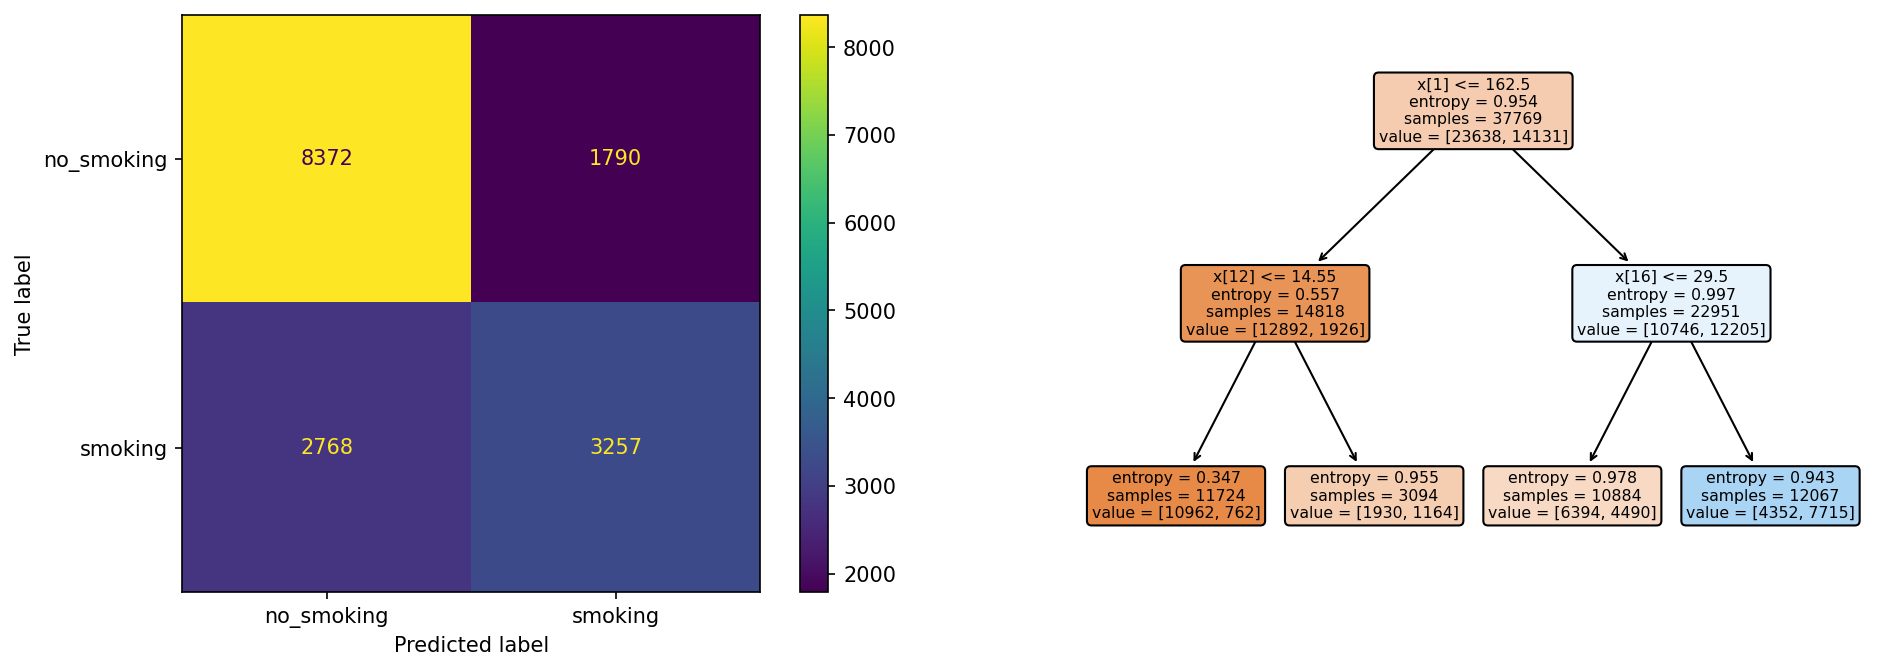

In [5]:
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  ConfusionMatrixDisplay, RocCurveDisplay
from statsmodels.stats.proportion import proportion_confint

clf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=2,min_impurity_decrease=0.02)

pred = clf.fit(X_train, y_train).predict(X_test)
fig, axes = plt.subplots(1,2,figsize=(15,5))
ax = axes.reshape(-1)[0]
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=["no_smoking", "smoking"], ax=ax)

# La curva ROC muestra la relación entre la tasa de verdaderos positivos (TPR, True Positive Rate) en el eje y y la tasa de falsos positivos (FPR, False Positive Rate) en el eje x. 
ax = axes.reshape(-1)[1]
RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax, pos_label=1)

# Obtain accuracy score of learned classifier on test data
print(clf.score(X_test, y_test))
print(confusion_matrix(y_test, pred))
print()
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, pred))
print()
print(sklearn.metrics.classification_report(y_test, pred))
epsilon = sklearn.metrics.accuracy_score(y_test, pred)
proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='normal')

fig = plt.gcf()
fig.set_dpi(150)

tree.plot_tree(clf, filled=True,rounded=True)
fig.savefig('tree.png')
plt.show()

Find best params

In [6]:
from sklearn.model_selection import GridSearchCV

params = {
    'criterion': ['entropy','gini'],
    'splitter': ['best','random'],
    'min_impurity_decrease': list(np.linspace(0,0.5,50)),
    'min_samples_split':list(range(2,20,5)),
    }
clf = GridSearchCV(tree.DecisionTreeClassifier(criterion='entropy'), param_grid=params,cv=10,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
clf.fit(X_train, y_train)
print("Best Params =",clf.best_params_, "Accuracy=", clf.best_score_)
  

Best Params = {'criterion': 'entropy', 'min_impurity_decrease': 0.0, 'min_samples_split': 2, 'splitter': 'best'} Accuracy= 0.7549045951073177


Try classification with best params

0.7229258046580589
[[8152 2010]
 [2475 3550]]

Accuracy: 0.7229258046580589

              precision    recall  f1-score   support

       False       0.77      0.80      0.78     10162
        True       0.64      0.59      0.61      6025

    accuracy                           0.72     16187
   macro avg       0.70      0.70      0.70     16187
weighted avg       0.72      0.72      0.72     16187

Interval of confidence: (0.7160311929659714, 0.7298204163501464)


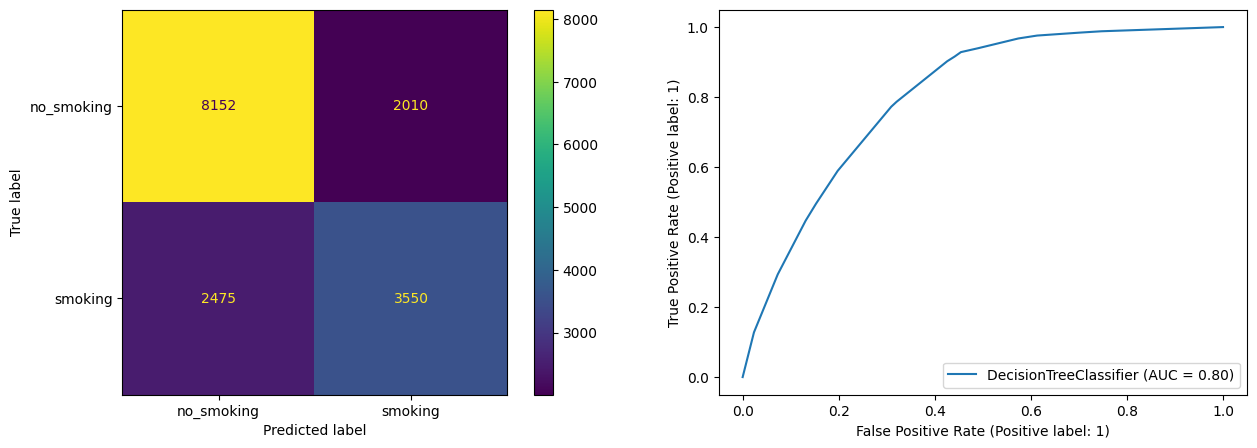

In [7]:
clf=tree.DecisionTreeClassifier(criterion=clf.best_params_['criterion'], splitter=clf.best_params_['splitter'], min_samples_split=clf.best_params_['min_samples_split'],min_impurity_decrease=clf.best_params_['min_impurity_decrease'], max_depth=4)
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)

fig, axes = plt.subplots(1,2,figsize=(15,5))
ax = axes.reshape(-1)[0]
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=["no_smoking", "smoking"], ax=ax)

# La curva ROC muestra la relación entre la tasa de verdaderos positivos (TPR, True Positive Rate) en el eje y y la tasa de falsos positivos (FPR, False Positive Rate) en el eje x. 
ax = axes.reshape(-1)[1]
RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax, pos_label=1)

# Obtain accuracy score of learned classifier on test data
print(clf.score(X_test, y_test))
print(confusion_matrix(y_test, pred))
print()
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, pred))
print()
print(sklearn.metrics.classification_report(y_test, pred))
epsilon = sklearn.metrics.accuracy_score(y_test, pred)
print("Interval of confidence:", proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='normal'))


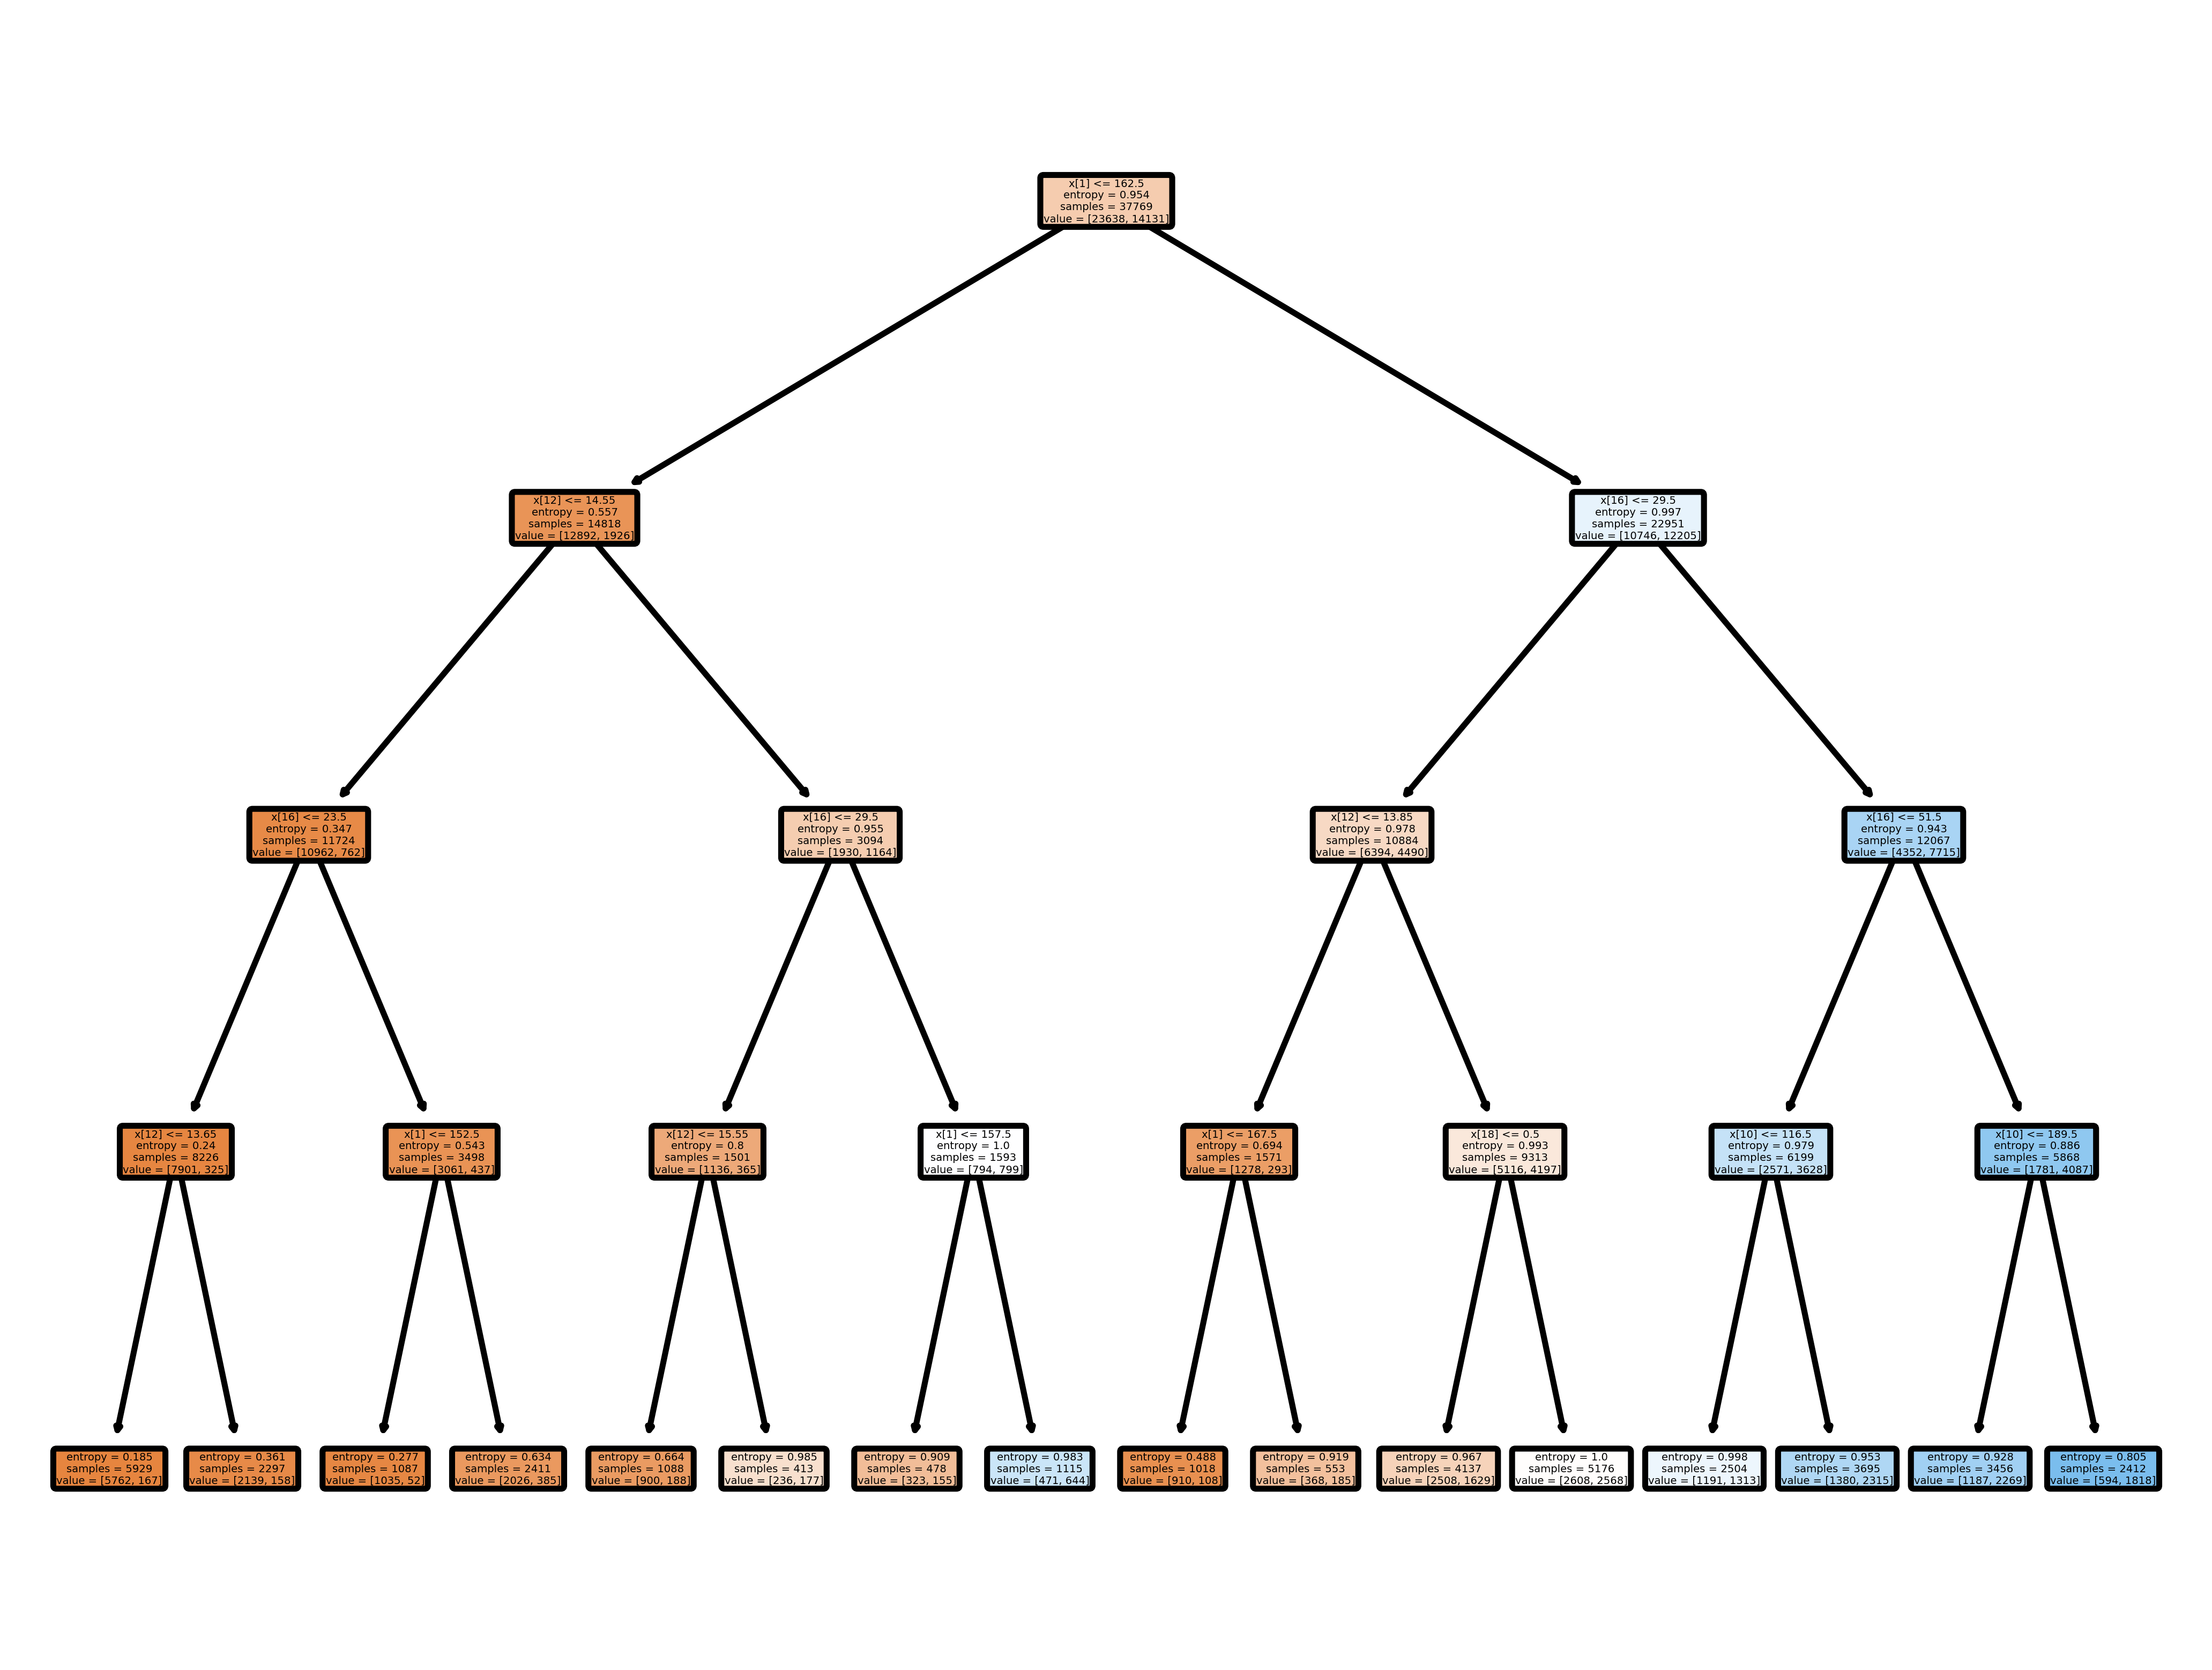

In [8]:
fig = plt.gcf()
fig.set_dpi(800)
tree.plot_tree(clf, filled=True,rounded=True)
fig.savefig('best_tree.png')
plt.show()